### Customer Segmentation
#### 0. Packages and datasets setup
#### 1. Data Inspection
#### 2. Handle Missing Values
#### 3. Handle Skewness of Data
#### 4. Feature Engineering min max 
#### 5. Check Correlation Between Features
#### 6. Reduce Dimension (PCA)
#### 6. Segmentation Models
- **K-Means**: Fast and widely used, good for well-separated clusters.
- **DBSCAN**: Great for detecting clusters of varying shapes and handling noise.
- **Gaussian Mixture Models (GMM)**: Probabilistic clustering, good when clusters have overlapping distributions.
- **Hierarchical Clustering**: Creates a dendrogram, useful when the number of clusters is unknown.
- **Spectral Clustering**: Uses graph-based techniques, useful for complex cluster structures.
#### 7. Evaluation Metrics
- **Silhouette Score**
- **Davies-Bouldin Index (DBI)**
- **Calinski-Harabasz Index**
- **Elbow Method**
- **Gap Statistic**
- **Cluster Distribution Check**
- **Principal Component Analysis (PCA) for Visualization**
- **t-SNE for Visualization**


## 0. Packages and Datasets Setup

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, boxcox, yeojohnson
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


In [8]:
df = pd.read_csv('../Data/digital_marketing_campaign_dataset.csv')

In [9]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [10]:
df['AdvertisingTool'].unique

<bound method Series.unique of 0       ToolConfid
1       ToolConfid
2       ToolConfid
3       ToolConfid
4       ToolConfid
           ...    
7995    ToolConfid
7996    ToolConfid
7997    ToolConfid
7998    ToolConfid
7999    ToolConfid
Name: AdvertisingTool, Length: 8000, dtype: object>

## 1. Data Inspection

In [11]:
df.head(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
5,8005,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,IsConfid,ToolConfid,1
6,8006,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,IsConfid,ToolConfid,1
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,IsConfid,ToolConfid,1
8,8008,36,Female,140788,Email,Retention,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,IsConfid,ToolConfid,1
9,8009,40,Male,130764,Social Media,Awareness,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,IsConfid,ToolConfid,1


In [12]:
num_rows, num_cols = df.shape
print('df has {} rows and {} columns'.format(num_rows, num_cols))

df has 8000 rows and 20 columns


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [14]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


## 2. Missing Value Handling

In [15]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = missing_percentage[missing_percentage > 0]
print(missing_data)



Series([], dtype: float64)


In [16]:
missing_percentage

CustomerID             0.0
Age                    0.0
Gender                 0.0
Income                 0.0
CampaignChannel        0.0
CampaignType           0.0
AdSpend                0.0
ClickThroughRate       0.0
ConversionRate         0.0
WebsiteVisits          0.0
PagesPerVisit          0.0
TimeOnSite             0.0
SocialShares           0.0
EmailOpens             0.0
EmailClicks            0.0
PreviousPurchases      0.0
LoyaltyPoints          0.0
AdvertisingPlatform    0.0
AdvertisingTool        0.0
Conversion             0.0
dtype: float64

## 3. Encode Non-numerical Columns

In [17]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

In [18]:
print(df.dtypes)

CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
dtype: object


In [19]:
# Iterate over all columns that are of type 'object'
for column in df.select_dtypes(include=['object']).columns:
    # Get the number of unique values and the unique values themselves
    num_unique = df[column].nunique()
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Number of unique values: {num_unique}")
    print(f"Unique values: {unique_values}")
    print('-' * 40)  # Separator line for clarity


Column: Gender
Number of unique values: 2
Unique values: ['Female' 'Male']
----------------------------------------
Column: CampaignChannel
Number of unique values: 5
Unique values: ['Social Media' 'Email' 'PPC' 'Referral' 'SEO']
----------------------------------------
Column: CampaignType
Number of unique values: 4
Unique values: ['Awareness' 'Retention' 'Conversion' 'Consideration']
----------------------------------------
Column: AdvertisingPlatform
Number of unique values: 1
Unique values: ['IsConfid']
----------------------------------------
Column: AdvertisingTool
Number of unique values: 1
Unique values: ['ToolConfid']
----------------------------------------


In [20]:
df = df.drop(columns=["AdvertisingTool","AdvertisingPlatform", "CustomerID"])

In [21]:
# Define the columns that need to be one-hot encoded
columns_to_encode = ['Gender', 'CampaignChannel', 'CampaignType']

# Use pandas get_dummies for one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)



In [22]:
df_encoded.dtypes
df = df_encoded

In [23]:
# Select numerical columns (int64, float64)
df_numerical = df.select_dtypes(include=['int64', 'float64'])

# Select boolean columns (bool)
df_bool = df.select_dtypes(include=['bool'])

# Print results
print("Numerical Columns:")
print(df_numerical.head())

print("\nBoolean Columns:")
print(df_bool.head())

Numerical Columns:
   Age  Income      AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
0   56  136912  6497.870068          0.043919        0.088031              0   
1   69   41760  3898.668606          0.155725        0.182725             42   
2   46   88456  1546.429596          0.277490        0.076423              2   
3   32   44085   539.525936          0.137611        0.088004             47   
4   60   83964  1678.043573          0.252851        0.109940              0   

   PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  EmailClicks  \
0       2.399017    7.396803            19           6            9   
1       2.917138    5.352549             5           2            7   
2       8.223619   13.794901             0          11            2   
3       4.540939   14.688363            89           2            2   
4       2.046847   13.993370             6           6            6   

   PreviousPurchases  LoyaltyPoints  Conversion  
0                  4   

In [24]:
df_bool

,Gender_Female,Gender_Male,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,True,False,False,False,False,False,True,True,False,False,False
1,False,True,True,False,False,False,False,False,False,False,True
2,True,False,False,True,False,False,False,True,False,False,False
3,True,False,False,True,False,False,False,False,False,True,False
4,True,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
7995,False,True,True,False,False,False,False,True,False,False,False
7996,True,False,False,False,False,True,False,False,False,False,True
7997,True,False,False,False,True,False,False,False,True,False,False
7998,True,False,False,True,False,False,False,False,True,False,False


## 4. Remove Outliers 

In [25]:
# Compute Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['int64', 'float64'])))

# Define a threshold (e.g., 3 standard deviations)
threshold = 6
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

print(df_no_outliers.shape)


(8000, 25)


In [26]:
df = df_no_outliers

In [27]:
df

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,Gender_Male,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,...,False,False,False,False,False,True,True,False,False,False
1,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,...,True,True,False,False,False,False,False,False,False,True
2,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,...,False,False,True,False,False,False,True,False,False,False
3,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,...,False,False,True,False,False,False,False,False,True,False
4,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,21,24849,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,...,True,True,False,False,False,False,True,False,False,False
7996,43,44718,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,...,False,False,False,False,True,False,False,False,False,True
7997,28,125471,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,...,False,False,False,True,False,False,False,True,False,False
7998,19,107862,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,...,False,False,True,False,False,False,False,True,False,False


## 5. Min-Max Scaling 

In [28]:

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df[numerical_cols]

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)
print(df_scaled.head())
df = df_scaled


        Age    Income   AdSpend  ClickThroughRate  ConversionRate  \
0  0.745098  0.899409  0.646384          0.116958        0.410648   
1  1.000000  0.167313  0.383781          0.502547        0.909094   
2  0.549020  0.526590  0.146130          0.922480        0.349542   
3  0.274510  0.185201  0.044401          0.440078        0.410505   
4  0.823529  0.492029  0.159427          0.837507        0.525971   

   WebsiteVisits  PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  \
0       0.000000       0.155422    0.475735      0.191919    0.315789   
1       0.857143       0.213000    0.334690      0.050505    0.105263   
2       0.040816       0.802699    0.917177      0.000000    0.578947   
3       0.959184       0.393450    0.978822      0.898990    0.105263   
4       0.000000       0.116287    0.930870      0.060606    0.315789   

   EmailClicks  PreviousPurchases  LoyaltyPoints  Conversion  
0     1.000000           0.444444       0.137628         1.0  
1     0.777778      

## 7. Check Covariance of Features

                        Age    Income   AdSpend  ClickThroughRate  \
Age                0.085388  0.000738 -0.000386          0.000977   
Income             0.000738  0.083603  0.000304          0.000677   
AdSpend           -0.000386  0.000304  0.082216         -0.000689   
ClickThroughRate   0.000977  0.000677 -0.000689          0.083936   
ConversionRate     0.001691  0.001466 -0.001672         -0.000683   
WebsiteVisits     -0.000177 -0.000247  0.000608         -0.001959   
PagesPerVisit     -0.000786  0.000324 -0.000769          0.000007   
TimeOnSite        -0.001108  0.001637 -0.000363         -0.000694   
SocialShares      -0.000813 -0.000532 -0.001763         -0.001124   
EmailOpens         0.001322 -0.000131  0.001423         -0.000529   
EmailClicks        0.000818  0.000784  0.000093         -0.000995   
PreviousPurchases -0.000668 -0.001106  0.000219         -0.000036   
LoyaltyPoints      0.001174 -0.000594  0.000168         -0.001434   
Conversion         0.000154  0.001

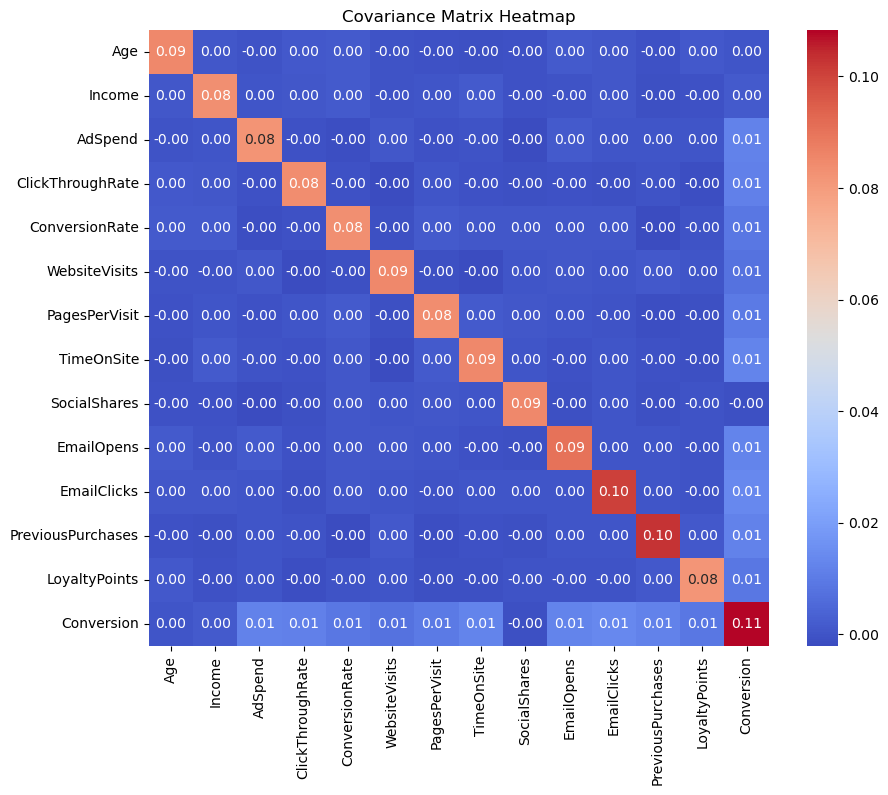

In [29]:
# Compute the covariance matrix for numerical columns
cov_matrix = df.cov()

# Display the covariance matrix
print(cov_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Covariance Matrix Heatmap")
plt.show()



## 8. Skewness Check

In [30]:
# Separate numerical and non-numeric columns
df_numerical = df.select_dtypes(include=['float64', 'int64'])
df_non_numeric = df.select_dtypes(exclude=['float64', 'int64'])

skew_numerical = df_numerical.skew()

# Since skewness only applies to numerical data, we won't compute it for non-numerical columns.
print("\nNon-Numeric Columns (Skewness not applicable):")
print(df_non_numeric.columns)




Non-Numeric Columns (Skewness not applicable):
Index([], dtype='object')


In [31]:
print("Skewness for Numerical Columns:")
print(skew_numerical)


Skewness for Numerical Columns:
Age                 -0.004916
Income              -0.011298
AdSpend              0.019224
ClickThroughRate     0.011066
ConversionRate       0.012777
WebsiteVisits       -0.017139
PagesPerVisit       -0.012510
TimeOnSite           0.014610
SocialShares        -0.011357
EmailOpens           0.007679
EmailClicks          0.023366
PreviousPurchases    0.005712
LoyaltyPoints        0.016303
Conversion          -2.289112
dtype: float64


In [32]:
# Inspect the range of values for the 'Conversion' column
conversion_range = df['Conversion'].min(), df['Conversion'].max()
print(f"Range of 'Conversion' values: {conversion_range}")

# Inspect the uniqueness of values for the 'Conversion' column
conversion_unique = df['Conversion'].unique()
print(f"Unique values in 'Conversion' column: {conversion_unique}")

# Get the number of unique values
conversion_unique_count = len(conversion_unique)
print(f"Number of unique values in 'Conversion' column: {conversion_unique_count}")


Range of 'Conversion' values: (0.0, 1.0)
Unique values in 'Conversion' column: [1. 0.]
Number of unique values in 'Conversion' column: 2


In [33]:
df.isnull().sum()

Age                  0
Income               0
AdSpend              0
ClickThroughRate     0
ConversionRate       0
WebsiteVisits        0
PagesPerVisit        0
TimeOnSite           0
SocialShares         0
EmailOpens           0
EmailClicks          0
PreviousPurchases    0
LoyaltyPoints        0
Conversion           0
dtype: int64

# K-Means Clustering

In [34]:
range_n_clusters = range(2, 20)
silhouette_scores = {}
inertia_values = {}

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    sil_score = silhouette_score(df, labels)
    inertia = kmeans.inertia_
    
    silhouette_scores[n_clusters] = sil_score
    inertia_values[n_clusters] = inertia
    
    print(f"Clusters: {n_clusters}, Silhouette Score: {sil_score:.4f}, Inertia: {inertia:.4f}")

Clusters: 2, Silhouette Score: 0.1945, Inertia: 8981.3695
Clusters: 3, Silhouette Score: 0.0762, Inertia: 8456.1186
Clusters: 4, Silhouette Score: 0.0669, Inertia: 8133.3255
Clusters: 5, Silhouette Score: 0.0645, Inertia: 7911.8132
Clusters: 6, Silhouette Score: 0.0608, Inertia: 7740.2085
Clusters: 7, Silhouette Score: 0.0597, Inertia: 7596.9276
Clusters: 8, Silhouette Score: 0.0591, Inertia: 7471.1189
Clusters: 9, Silhouette Score: 0.0586, Inertia: 7359.7289
Clusters: 10, Silhouette Score: 0.0581, Inertia: 7265.7010
Clusters: 11, Silhouette Score: 0.0583, Inertia: 7162.8211
Clusters: 12, Silhouette Score: 0.0553, Inertia: 7074.7048
Clusters: 13, Silhouette Score: 0.0559, Inertia: 6988.3010
Clusters: 14, Silhouette Score: 0.0564, Inertia: 6905.2355
Clusters: 15, Silhouette Score: 0.0555, Inertia: 6845.5910
Clusters: 16, Silhouette Score: 0.0546, Inertia: 6786.7766
Clusters: 17, Silhouette Score: 0.0562, Inertia: 6718.0393
Clusters: 18, Silhouette Score: 0.0557, Inertia: 6656.2633
Clust

In [1]:
# Plot the Elbow Plot
plt.figure(figsize=(7, 5))
plt.plot(list(inertia_values.keys()), list(inertia_values.values()), marker='o')
plt.title("Elbow Plot (Inertia vs. Number of Clusters)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

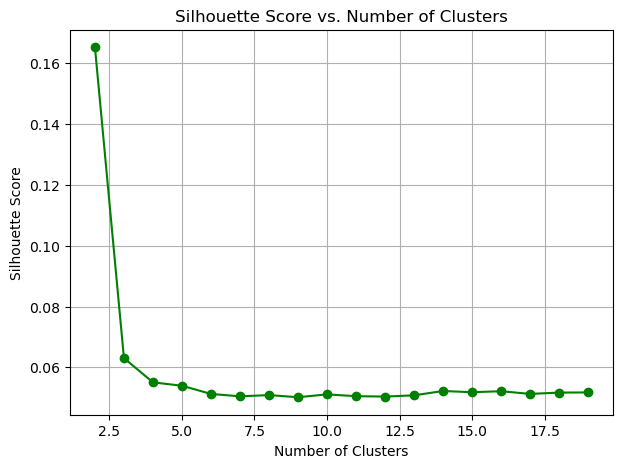

In [ ]:
# Plot the Silhouette Score
plt.figure(figsize=(7, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', color='green')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [ ]:
# Find the best number of clusters by silhouette score
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nOptimal number of clusters (based on silhouette): {optimal_clusters}")


Optimal number of clusters (based on silhouette): 2


# Final Clustering

In [ ]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
final_labels = kmeans_optimal.fit_predict(df_scaled)

# Add cluster labels to the original dataframe for analysis
df['Cluster'] = final_labels

# PCA for 2D Visualization
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df_scaled)

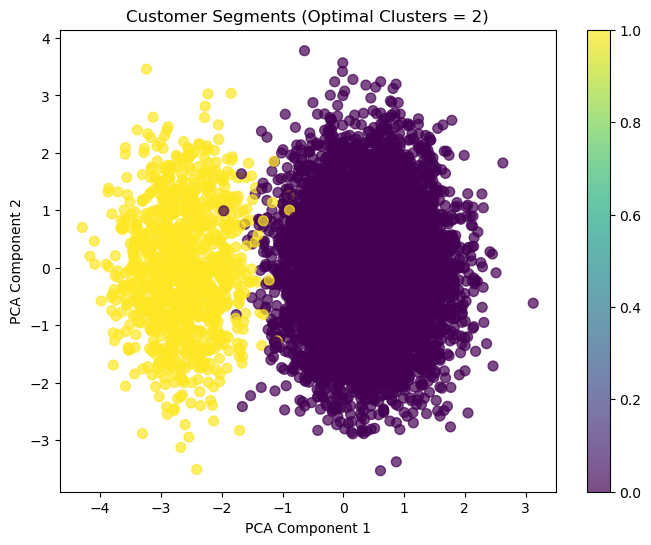

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=final_labels, cmap='viridis', s=50, alpha=0.7)
plt.title(f"Customer Segments (Optimal Clusters = {optimal_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

# Other Clustering Method


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming your data is in df
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)  # Scale only numerical features



In [ ]:
# Assuming df is your DataFrame and it's already cleaned and preprocessed
# We will scale the data for better clustering performance

df_scaled = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)


In [ ]:
# Fit the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')  # 'n_clusters' is the number of clusters you want
df['Cluster'] = agg_clustering.fit_predict(df_scaled)  # Assign cluster labels to the data

# Show the clusters in the data
print(df[['CustomerID', 'Cluster']].head())


   CustomerID  Cluster
0        8000        1
1        8001        0
2        8002        2
3        8003        2
4        8004        0


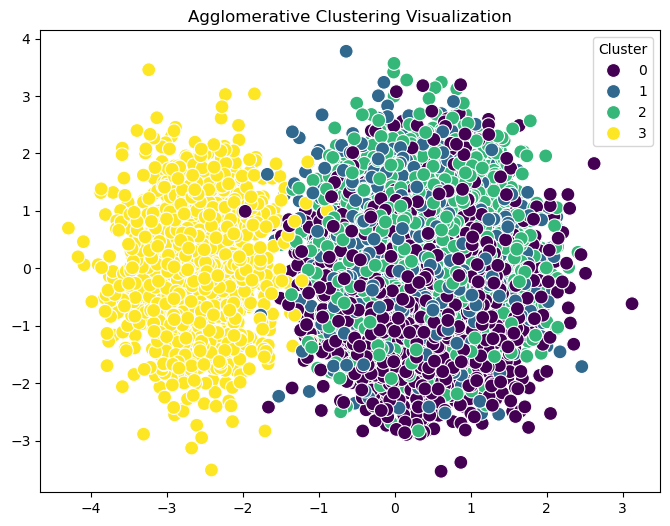

In [ ]:
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Agglomerative Clustering Visualization')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.023958117663037893


In [ ]:
for n in range(2, 10):  # Try cluster values between 2 and 9
    agg_clustering = AgglomerativeClustering(n_clusters=n, linkage='ward')
    df['Cluster'] = agg_clustering.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
    print(f'Number of clusters: {n}, Silhouette Score: {silhouette_avg}')


Number of clusters: 2, Silhouette Score: 0.1652544403465454
Number of clusters: 3, Silhouette Score: 0.031827454171880355
Number of clusters: 4, Silhouette Score: 0.023958117663037893
Number of clusters: 5, Silhouette Score: 0.018415310506280865
Number of clusters: 6, Silhouette Score: 0.017494559489358963
Number of clusters: 7, Silhouette Score: 0.013452068092609485
Number of clusters: 8, Silhouette Score: 0.012308988110910728
Number of clusters: 9, Silhouette Score: 0.010738751515507024


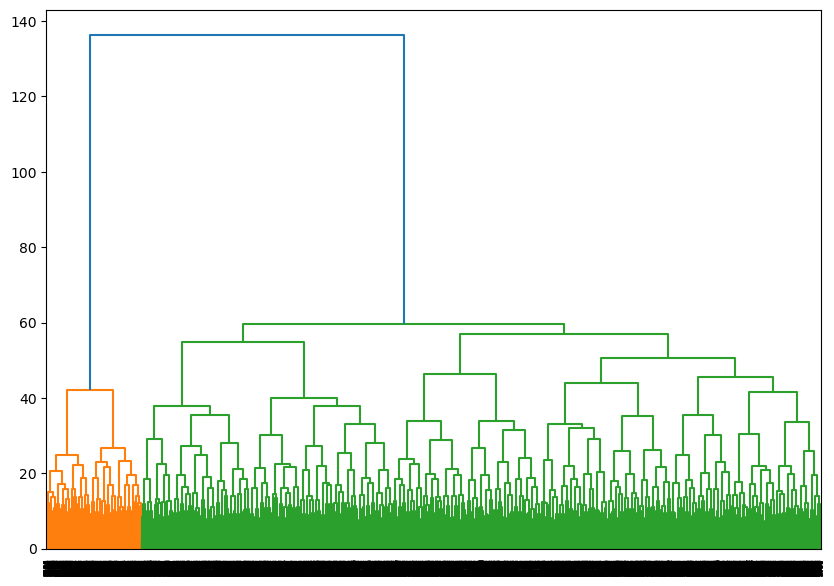

In [ ]:


# Perform hierarchical/agglomerative clustering
Z = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()
